# About the dataset
## Context
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.
### Flavors of Cacao Rating System:
- 5= Elite (Transcending beyond the ordinary limits)
- 4= Premium (Superior flavor development, character and style)
- 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2= Disappointing (Passable but contains at least one significant flaw)
- 1= Unpleasant (mostly unpalatable)



![Photo by <a href="https://unsplash.com/@foodess?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Food Photographer | Jennifer Pallian</a> on <a href="https://unsplash.com/s/photos/chocolate?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  ](https://images.unsplash.com/photo-1481391319762-47dff72954d9?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&dl=food-photographer-jennifer-pallian-dcPNZeSY3yk-unsplash.jpg)
<br />

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

**Flavor** is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered. It is possible for a straight forward single note chocolate to rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post harvest techniques, processing and storage can all be discussed when considering the flavor component.

**Texture** has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers vision, attention to detail and level of proficiency.

**Aftermelt** is the experience after the chocolate has melted. Higher quality chocolate will linger and be long lasting and enjoyable. Since the aftermelt is the last impression you get from the chocolate, it receives equal importance in the overall rating.

Overall Opinion is really where the ratings reflect a subjective opinion. Ideally it is my evaluation of whether or not the components above worked together and an opinion on the flavor development, character and style. It is also here where each chocolate can usually be summarized by the most prominent impressions that you would remember about each chocolate.

# Setting up the environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv


In [2]:
df = pd.read_csv("/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv")
df.sample(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
603,East Van Roasters,Dominican Republic,1343,2014,70%,Canada,3.75,,Dominican Republic
1435,Scharffen Berger,Las Islas,117,2007,72%,U.S.A.,3.00,Blend,Carribean(DR/Jam/Tri)
1373,Ritual,"Camino Verde P., Balao, Guayas, 2014",1466,2015,85%,U.S.A.,3.50,,Ecuador
371,Cello,Ecuador,1247,2014,70%,U.S.A.,2.50,,Ecuador
687,Fresco,"Markham Valley, #219, LR, MC",899,2012,69%,U.S.A.,3.50,,Papua New Guinea
568,Domori,Granella,135,2007,60%,Italy,3.25,Trinitario,Venezuela
290,Cacao de Origen,Rio Caribe,1692,2015,75%,Venezuela,3.25,Trinitario,Venezuela
168,Belcolade,Peru,586,2010,64%,Belgium,2.75,,Peru
1738,Wilkie's Organic,Amazonas w/ nibs,1173,2013,75%,Ireland,2.75,Criollo,Peru
1676,Un Dimanche A Paris,Dominican Republic,709,2011,63%,France,3.75,,Dominican Republic


# Cleaning the data
To make it easy for us to refer the columns, I'm renaming them.

In [3]:
df.columns = ["Company", "Specific Bean Origin or Bar Name", "REF", "Review Date", "Cocoa Percent", "Location", "Rating", "Bean Type", "Broad Bean Origin"]
df.sample()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Location,Rating,Bean Type,Broad Bean Origin
434,Claudio Corallo,Terreiro Velho P.,470,2010,73.5%,Sao Tome,3.75,Forastero,Sao Tome & Principe


Let's get some info about our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Location                          1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Here we can see that there aren't many null values in out dataset.

In [5]:
df.sample(10)

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Location,Rating,Bean Type,Broad Bean Origin
1654,Theo,Congo w/ nibs,903,2012,65%,U.S.A.,3.25,Forastero,Congo
48,Altus aka Cao Artisan,Gruppo Salinas,1732,2016,60%,U.S.A.,2.75,,Ecuador
376,Chaleur B,Uganda,1426,2014,70%,Canada,2.75,Forastero,Uganda
1021,Manoa,Markham Valley,1522,2015,72%,U.S.A.,3.50,,Papua New Guinea
1758,Xocolat,Hispaniola,1057,2013,66%,Domincan Republic,3.00,,Dominican Republic
600,Durci,Corona Arriba,1630,2015,70%,U.S.A.,4.00,,Ecuador
446,Confluence,"Tien Giang, 2015, batch 10-2-16",1916,2016,78%,U.S.A.,2.75,Trinitario,Vietnam
527,Dean and Deluca (Belcolade),Papua New Guinea,180,2007,64%,U.S.A.,3.00,,Papua New Guinea
731,Georgia Ramon,Conacado Coop,1646,2015,80%,Germany,3.50,Trinitario,Domincan Republic
944,Laia aka Chat-Noir,"Cuba, Batch 59/100",1590,2015,75%,France,3.00,,Cuba


But in this sample we can see that there are a lot of blanks in the `Bean Type` column.

Let's clean that.

In [6]:
list(df['Bean Type'][0:5])

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0']

In [7]:
df = df.applymap(lambda x: np.nan if str(x).strip()=="\xa0" else x)
df = df.applymap(lambda x: np.nan if str(x).strip()=="" else x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Location                          1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         907 non-null    object 
 8   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Now we can see that there are a lot of missing values in `Bean Type`.

In [9]:
df['Bean Type'].value_counts()

Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Matina                        3
Nacional (Arriba)             3
Criollo, Forastero            2
Criollo (Amarru)              2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Nacional                      2
Criollo (Ocumare 61)          2
Amazon mix                    2
Trinitario, Forastero         2
Amazon, ICS                   2
CCN51                         1
Criollo (Wild)                1
Blend-Forastero,Criollo       1
Criollo (Ocumare 77)          1
Trinitario (Amelonado)        1
Trinitario, TCGA              1
Forastero(Arriba, CCN)        1
Criollo 

We have two options here:
1. Fill all of the null values with the mode value (`Trinitario`)
2. Drop the column

Let's try method 1.

In [10]:
df['Bean Type'] = df['Bean Type'].fillna('Trinitario')

In [11]:
df['Bean Type'].value_counts()

Trinitario                  1307
Criollo                      153
Forastero                     87
Forastero (Nacional)          52
Blend                         41
Criollo, Trinitario           39
Forastero (Arriba)            37
Criollo (Porcelana)           10
Trinitario, Criollo            9
Forastero (Parazinho)          8
Forastero (Arriba) ASS         6
EET                            3
Beniano                        3
Matina                         3
Nacional (Arriba)              3
Criollo, Forastero             2
Criollo (Amarru)               2
Trinitario (85% Criollo)       2
Forastero (Catongo)            2
Nacional                       2
Criollo (Ocumare 61)           2
Amazon mix                     2
Trinitario, Forastero          2
Amazon, ICS                    2
CCN51                          1
Criollo (Wild)                 1
Blend-Forastero,Criollo        1
Criollo (Ocumare 77)           1
Trinitario (Amelonado)         1
Trinitario, TCGA               1
Forastero(

But now if we see, `Trinitario` is a little too much (as there were a lot of null values) and might end up affecting the results. Therefore, we will drop the whole column.

In [12]:
df.drop(['Bean Type'], axis=1, inplace=True)

In [13]:
df.sample()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin
1279,Paul Young,"Madagascar, w/ shell",1271,2014,64%,U.K.,2.75,Madagascar


Great!

Now, let's analyze the `Company` column.

In [14]:
df['Company'].value_counts()

Soma                  47
Bonnat                27
Fresco                26
Pralus                25
A. Morin              23
                      ..
Breeze Mill            1
Cloudforest            1
La Oroquidea           1
Cote d' Or (Kraft)     1
Garden Island          1
Name: Company, Length: 416, dtype: int64

We can see `Company` has 416 different classes.

Again, we have 2 options:
1. Group the companies based on some other metric
2. Drop the column

Let's check the top 14 companies.

In [15]:
top_companies = list(df['Company'].value_counts()[:14].index)
top_companies

['Soma',
 'Bonnat',
 'Fresco',
 'Pralus',
 'A. Morin',
 'Guittard',
 'Domori',
 'Arete',
 'Valrhona',
 'Hotel Chocolat (Coppeneur)',
 'Coppeneur',
 'Mast Brothers',
 'Zotter',
 'Scharffen Berger']

Maybe, we can group the rest of the companies as `Other`.

In [16]:
df['Company'] = df['Company'].apply(lambda x: x if x in top_companies else 'Other')
df['Company'].value_counts()

Other                         1471
Soma                            47
Bonnat                          27
Fresco                          26
Pralus                          25
A. Morin                        23
Guittard                        22
Arete                           22
Domori                          22
Valrhona                        21
Hotel Chocolat (Coppeneur)      19
Coppeneur                       18
Mast Brothers                   18
Zotter                          17
Scharffen Berger                17
Name: Company, dtype: int64

We have the same problem as `Bean Type`. Therefore, let's drop this column too.

In [17]:
df.drop(['Company'], axis=1, inplace=True)

In [18]:
df.sample()

,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin
1666,Dominican Republic,789,2011,74%,U.S.A.,3.0,Dominican Republic


Nice!

Now let's convert the `Cocoa Percent` to *float*.

In [19]:
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda x: float(x.strip('%')) / 100.0)

In [20]:
df.sample(3)

,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin
675,"Palo Blanco, Chulucanas",883,2012,0.61,U.S.A.,3.5,Peru
791,"Alto Beni, Upper Rio Beni, 2014",1239,2014,0.67,U.S.A.,3.5,Bolivia
355,Huila,1888,2016,0.65,Colombia,3.5,Colombia


Awesome!

Now let's see the `Specific Bean Origin or Bar Name` column and the `Broad Bean Origin` column.

In [21]:
df['Specific Bean Origin or Bar Name'].value_counts()

Madagascar                                       57
Peru                                             45
Ecuador                                          42
Dominican Republic                               37
Venezuela                                        21
                                                 ..
Bahia Superior                                    1
Wild Beni, Lower Rio Beni, Tranquilidad, 2014     1
Carenero Superior, Urrutia, Barlovento            1
Selva Maya                                        1
Bali                                              1
Name: Specific Bean Origin or Bar Name, Length: 1039, dtype: int64

In [22]:
df['Broad Bean Origin'].value_counts()

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                ... 
Ven, Trinidad, Ecuador             1
Mad., Java, PNG                    1
Nigeria                            1
Venezuela, Dom. Rep.               1
Peru(SMartin,Pangoa,nacional)      1
Name: Broad Bean Origin, Length: 99, dtype: int64

In [23]:
df.sample(10)

,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin
820,Mara,1466,2015,0.70,Israel,3.50,Venezuela
796,"Los Rios, Hacienda Limon, Orecao, 2015",1744,2016,0.70,U.S.A.,3.50,Ecuador
601,Peru,1343,2014,0.70,Canada,3.25,Peru
268,Somia Plantation,1231,2014,0.72,Australia,3.00,Madagascar
901,"La Red, Guanconjeco",1251,2014,0.60,U.S.A.,3.00,Dominican Republic
667,Ghana,1351,2014,0.60,Belgium,3.50,Ghana
536,Tien Giang,1864,2016,0.78,U.S.A.,3.50,Vietnam
395,Uganda,1760,2016,0.70,U.S.A.,2.75,Uganda
505,Las Acacias E.,423,2009,0.75,Guatemala,3.00,Guatemala
1537,Cahabon Region,951,2012,0.70,Canada,3.50,Guatemala


Here we can see the two columns are very similar. Therefore, we can drop `Specific Bean Origin or Bar Name`.

In [24]:
df.drop(['Specific Bean Origin or Bar Name'], axis=1, inplace=True)

In [25]:
df.sample()

,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin
451,959,2012,0.7,Germany,3.5,Madagascar


Cool!

In [26]:
df['Broad Bean Origin'].value_counts()

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                ... 
Ven, Trinidad, Ecuador             1
Mad., Java, PNG                    1
Nigeria                            1
Venezuela, Dom. Rep.               1
Peru(SMartin,Pangoa,nacional)      1
Name: Broad Bean Origin, Length: 99, dtype: int64

Let's reduce the number of classes in this column.

In [27]:
top_origin = list(df['Broad Bean Origin'].value_counts()[:14].index)
top_origin

['Venezuela',
 'Ecuador',
 'Peru',
 'Madagascar',
 'Dominican Republic',
 'Nicaragua',
 'Brazil',
 'Bolivia',
 'Belize',
 'Papua New Guinea',
 'Colombia',
 'Costa Rica',
 'Vietnam',
 'Tanzania']

In [28]:
df['Broad Bean Origin'] = df['Broad Bean Origin'].apply(lambda x: x if x in top_origin else 'Other')

In [29]:
df['Broad Bean Origin'].value_counts()

Other                 521
Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Vietnam                38
Costa Rica             38
Tanzania               34
Name: Broad Bean Origin, dtype: int64

# Feature Generation
We can classify the chocolates into `Dark`, `Normal` and `White` chocolates.

In [30]:
df[df['Cocoa Percent']<0.7].sample(10)

,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin
1277,1034,2013,0.67,U.S.A.,4.00,Peru
261,1514,2015,0.60,U.S.A.,3.00,Dominican Republic
1410,607,2010,0.64,Italy,3.50,Madagascar
1592,1796,2016,0.60,Venezuela,3.00,Venezuela
798,1744,2016,0.68,U.S.A.,3.75,Bolivia
1687,757,2011,0.64,France,4.00,Venezuela
925,451,2009,0.68,U.S.A.,3.00,Bolivia
951,1438,2014,0.68,France,2.75,Other
1788,883,2012,0.68,Austria,3.25,Other
1460,725,2011,0.65,Italy,3.25,Other


In [31]:
df['Chocolate Type'] = df['Cocoa Percent'].apply(lambda x: 'dark' if x>=0.7 else 'normal' if x>0.0 else 'white')

In [32]:
df['Chocolate Type'].value_counts()

dark      1467
normal     328
Name: Chocolate Type, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF                1795 non-null   int64  
 1   Review Date        1795 non-null   int64  
 2   Cocoa Percent      1795 non-null   float64
 3   Location           1795 non-null   object 
 4   Rating             1795 non-null   float64
 5   Broad Bean Origin  1795 non-null   object 
 6   Chocolate Type     1795 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 98.3+ KB


Peace.

We can even group the `Location` column into continents.

In [34]:
# Lising top 10 countries
list(df['Location'].value_counts()[:10].index)

['U.S.A.',
 'France',
 'Canada',
 'U.K.',
 'Italy',
 'Ecuador',
 'Australia',
 'Belgium',
 'Switzerland',
 'Germany']

In [35]:
asia = ['Japan', 'Vietnam', 'Israel', 'South Korea', 'Singapore', 'India', 'Philippines', 'Russia']
africa = ['Madagascar', 'Sao Tome', 'South Africa', 'Ghana']
north_america = ['U.S.A.', 'Canada', 'Martinique', 'Niacragua', 'Guatemala', 'St. Lucia', 'Puerto Rico', 'Mexico', 'Costa Rica', 'Honduras', 'Nicaragua', 'Domincan Republic', ]
south_america = ['Ecuador', 'Eucador', 'Colombia', 'Suriname', 'Bolivia', 'Venezuela', 'Chile', 'Peru', 'Brazil', 'Argentina', 'Lithuania']
europe = ['France', 'Denmark', 'Scotland', 'Wales', 'Czech Republic', 'Finland', 'Ireland', 'Portugal', 'Netherlands', 'Poland', 'Amsterdam', 'Sweden', 'U.K.', 'Italy', 'Belgium', 'Switzerland', 'Germany', 'Austria', 'Spain', 'Hungary', ]
oceania = ['Australia', 'New Zealand', 'Fiji']

In [36]:
def continents(x):
    if x in asia:
        return 'asia'
    if x in africa:
        return 'africa'
    if x in north_america:
        return 'north america'
    if x in south_america:
        return 'south america'
    if x in europe:
        return 'europe'
    if x in oceania:
        return 'oceania'
    return 'europe'

In [37]:
df['Continent'] = df['Location'].apply(continents)

In [38]:
df.sample(5)

,REF,Review Date,Cocoa Percent,Location,Rating,Broad Bean Origin,Chocolate Type,Continent
831,1065,2013,0.90,U.K.,3.00,Ecuador,dark,europe
548,1688,2015,0.85,U.K.,3.00,Venezuela,dark,europe
1438,188,2007,0.75,U.S.A.,3.00,Other,dark,north america
1514,1594,2015,0.70,Canada,3.50,Venezuela,dark,north america
487,1387,2014,0.70,U.S.A.,3.75,Dominican Republic,dark,north america


In [39]:
df.drop(['Location'], axis=1, inplace=True)

In [40]:
df.sample()

,REF,Review Date,Cocoa Percent,Rating,Broad Bean Origin,Chocolate Type,Continent
227,629,2011,0.75,3.5,Other,dark,europe


In [41]:
df['Continent'].value_counts()

north america    936
europe           564
south america    152
oceania           70
asia              48
africa            25
Name: Continent, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF                1795 non-null   int64  
 1   Review Date        1795 non-null   int64  
 2   Cocoa Percent      1795 non-null   float64
 3   Rating             1795 non-null   float64
 4   Broad Bean Origin  1795 non-null   object 
 5   Chocolate Type     1795 non-null   object 
 6   Continent          1795 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 98.3+ KB


Now, let's drop the `REF` column as it is of no use to us.

In [43]:
df.drop(['REF'], axis=1, inplace=True)

In [44]:
df.sample()

,Review Date,Cocoa Percent,Rating,Broad Bean Origin,Chocolate Type,Continent
989,2010,0.55,2.25,Peru,normal,south america


Now let's convert the data type of the string columns into categorical data type.

In [45]:
df['Continent'] = pd.Categorical(df['Continent'])
df['Broad Bean Origin'] = pd.Categorical(df['Broad Bean Origin'])
df['Chocolate Type'] = pd.Categorical(df['Chocolate Type'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Review Date        1795 non-null   int64   
 1   Cocoa Percent      1795 non-null   float64 
 2   Rating             1795 non-null   float64 
 3   Broad Bean Origin  1795 non-null   category
 4   Chocolate Type     1795 non-null   category
 5   Continent          1795 non-null   category
dtypes: category(3), float64(2), int64(1)
memory usage: 48.5 KB


# EDA
Types of chocolates reviewed

<AxesSubplot:xlabel='Chocolate Type', ylabel='count'>

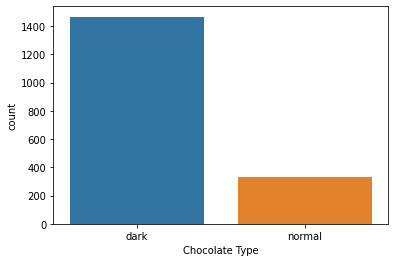

In [47]:
sns.countplot(x='Chocolate Type', data=df)

We can see that a lot more dark chocolates are reviewed.

*Maybe other types aren't really chocolates... just saying :)*

<AxesSubplot:xlabel='Cocoa Percent', ylabel='Rating'>

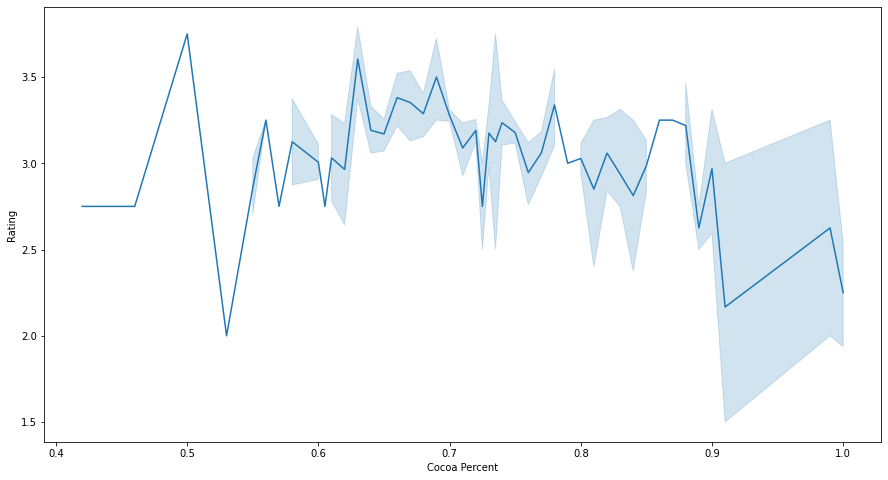

In [48]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Cocoa Percent', y='Rating', data=df)

According to this plot, we can see majority of the people do not like the extreme types of chocolate (i.e. too dark or too light). The *sweet spot* is around 60%-70%. 

*You see what I did there... **Sweet spot**... hehe*

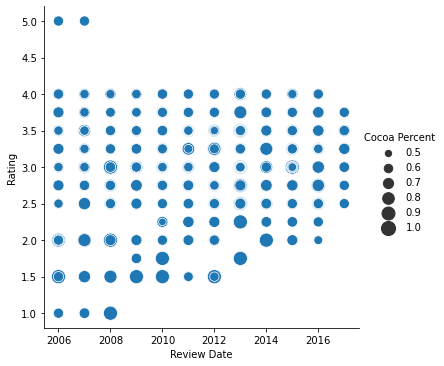

In [49]:
sns.relplot(x="Review Date", y="Rating", size="Cocoa Percent", sizes=(15, 200), data=df);

Here we can see people don't like very dark chocolates :/

The heavier dots are the bottom of the rating chart for almost all of the years

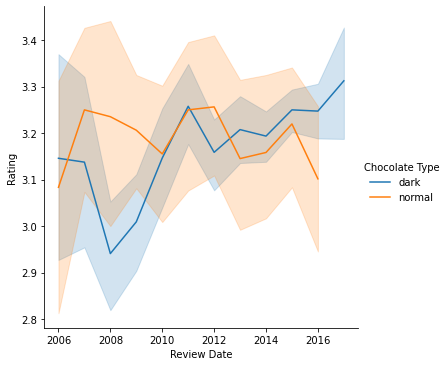

In [50]:
sns.relplot(x="Review Date", y="Rating", hue="Chocolate Type", kind="line", data=df);

Here we can see, the liking for dark chocolates have increased over the years whereas for the other, it's the same.

<AxesSubplot:xlabel='Continent', ylabel='count'>

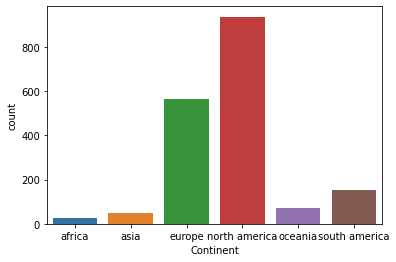

In [51]:
sns.countplot(x='Continent', data=df)

If we see this graph, we can make out that this dataset is not very diversed and could be biased towards the European's and the North American's likings.

<AxesSubplot:xlabel='Broad Bean Origin', ylabel='count'>

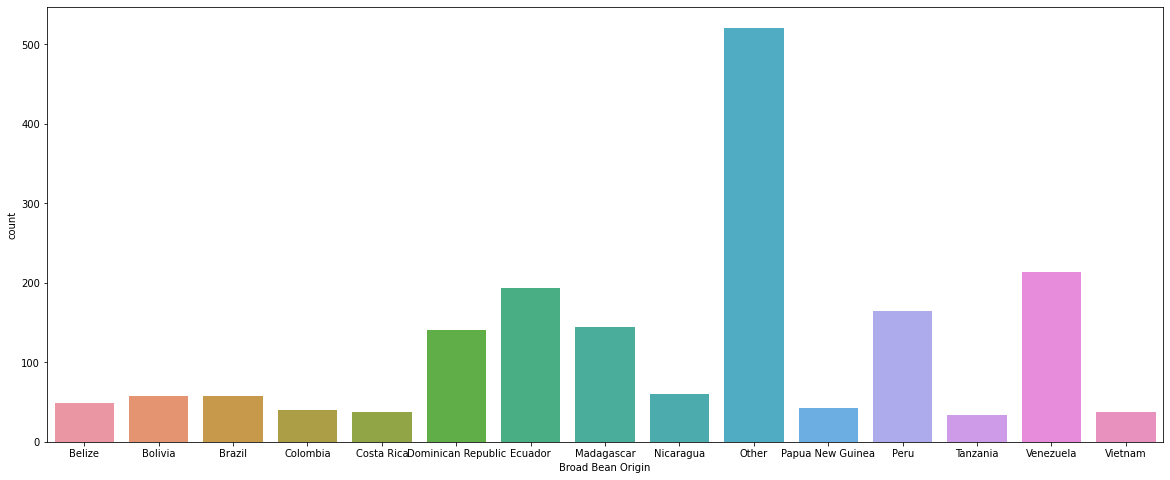

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(x='Broad Bean Origin', data=df)

If we exclude others, we can see that most of the `Broad Bean Origin` is in *Venezuela*.

<AxesSubplot:xlabel='Broad Bean Origin', ylabel='Rating'>

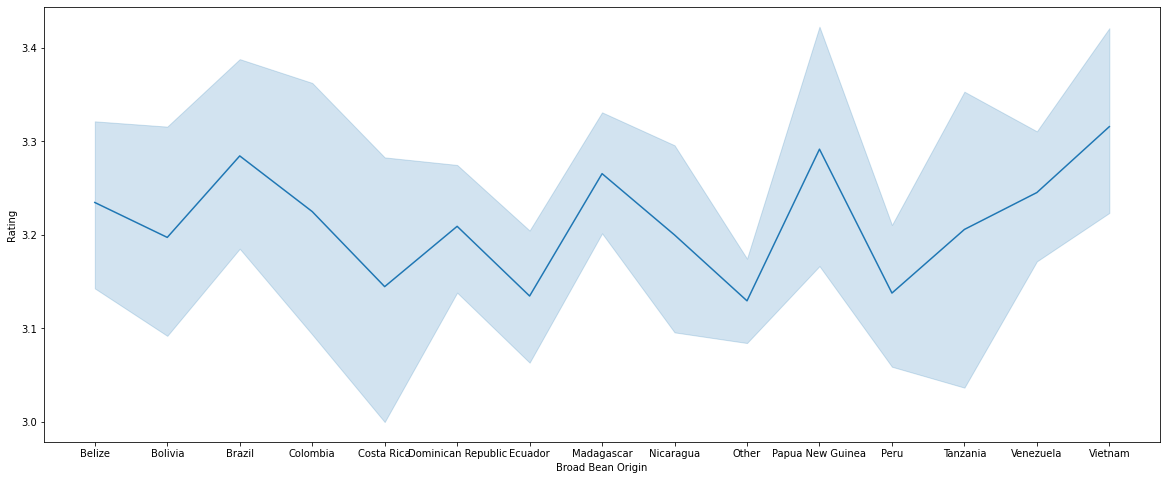

In [53]:
plt.figure(figsize=(20,8))
sns.lineplot(y='Rating', x='Broad Bean Origin', data=df)

In this plot we can see that beans from all of the origins are more or less equally liked.

In [54]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['Broad Bean Origin', 'Chocolate Type', 'Continent'], dtype='object')

In [55]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.sample(5)

,Review Date,Cocoa Percent,Rating,Broad Bean Origin,Chocolate Type,Continent
540,2013,0.76,3.50,6,0,3
1230,2014,0.68,2.75,10,1,2
888,2009,0.65,3.75,9,1,2
1666,2011,0.74,3.00,5,0,3
74,2015,0.68,3.50,11,1,3


Text(0.5, 1.0, 'Correlation Map')

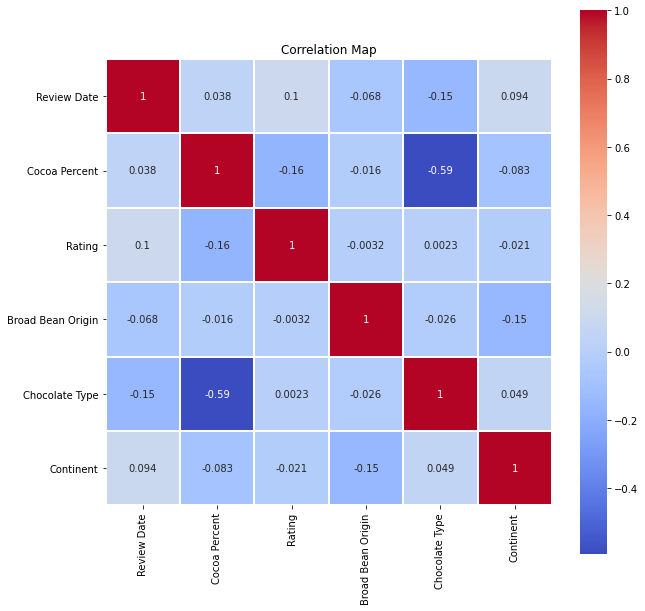

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Map")

Consider upvoting :)